In [1]:
import pandas as pd
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data

,Title,Body,Tags,title_bow_lem,body_bow_lem,title_bow_stem,body_bow_stem
0,spring mvc angularjs file upload org apa...,i have a java spring mvc web application as se...,"['java', 'spring', 'file', 'mvc']","['spring', 'mvc', 'angularjs', 'file', 'org', ...","['java', 'spring', 'mvc', 'application', 'serv...","['spring', 'mvc', 'angularj', 'file', 'org', '...","['java', 'spring', 'mvc', 'applic', 'server', ..."
1,what are some examples of design pattern imple...,i m a moderately skilled programmer using java...,"['design', 'javascript']","['design', 'javascript']","['programmer', 'javascript', 'guru', 'dom', 'm...","['design', 'javascript']","['programm', 'javascript', 'guru', 'dom', 'man..."
2,what s the best way to get to know linux or bs...,i d like to gain better knowledge of operating...,['linux'],"['linux', 'bsd']","['knowledge', 'operating', 'system', 'manageme...","['linux', 'bsd']","['knowledg', 'oper', 'system', 'manag', 'memor..."
3,is there a performance difference between i ...,is there a performance difference between and...,"['c', 'performance']","['performance', 'difference', 'c']","['performance', 'difference', 'value']","['perform', 'differ', 'c']","['perform', 'differ', 'valu']"
4,is there a performance difference between i ...,we have the question is there a performance di...,"['performance', 'cplusplus']","['performance', 'difference', 'cplusplus']","['performance', 'difference', 'c', 'answer', '...","['perform', 'differ', 'cplusplus']","['perform', 'differ', 'c', 'answer', 'cplusplus']"
...,...,...,...,...,...,...,...
24723,how does keras 1d convolution layer work with ...,i am currently developing a text classificatio...,['python'],"['convolution', 'layer', 'work', 'word', 'clas...","['text', 'classification', 'tool', 'validation...","['convolut', 'layer', 'work', 'word', 'classif...","['text', 'classif', 'tool', 'valid', 'accuraci..."
24724,clean architecture design pattern,i have some question about this pattern the...,"['java', 'design']","['architecture', 'design', 'pattern']","['pattern', 'database', 'layer', 'work', 'real...","['architectur', 'design', 'pattern']","['pattern', 'databas', 'layer', 'work', 'reali..."
24725,how to do nd distance and nearest neighbor cal...,this question is intended to be a canonical du...,"['arrays', 'python']","['distance', 'neighbor']","['duplicate', 'target', 'distance', 'shape', '...","['distanc', 'neighbor']","['duplic', 'target', 'distanc', 'shape', 'poin..."
24726,android studio emulator is not working on wind...,i have windows 11 on my system the system spe...,"['windows', 'android', 'studio']","['studio', 'emulator', 'whpx']","['system', 'system', 'specifiction', 'edition'...","['studio', 'emul', 'whpx']","['system', 'system', 'specifict', 'edit', 'hom..."


In [4]:
for c in ['Tags', 'title_bow_lem', 'body_bow_lem', 'title_bow_stem', 'body_bow_stem']:
    data[c] = data[c].apply(lambda x: eval(x))

In [5]:
X_train, X_test = train_test_split(data, train_size=0.8, random_state=27)

# LDA

In [9]:
import gensim
import gensim.corpora as corpora
#from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamulticore import LdaMulticore

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [6]:
def create_corpus(texts):
    id2word = corpora.Dictionary(texts)
    corpus = [id2word.doc2bow(text) for text in texts]
    return corpus, id2word

def compute_coherence_values(corpus, dictionary, k):
    
    lda_model = LdaMulticore(corpus=corpus,
                               id2word=dictionary,
                               num_topics=k, 
                               random_state=100,
                               chunksize=100,
                               passes=10)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [19]:
compar_resultats = {}

## body_bow_lem

In [10]:
texts = X_train['body_bow_lem'].values.tolist()
corpus, id2word = create_corpus(texts)

In [11]:
# Topics range
min_topics = 15
max_topics = 50
step_size = 5
topics_range = range(min_topics, max_topics, step_size)

model_results = {'Topics': [],'Coherence': []}

In [12]:
pbar = tqdm.tqdm(total=len(topics_range))

for k in topics_range:
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word, k=k)
    # Save the model results
    model_results['Topics'].append(k)
    model_results['Coherence'].append(cv)

    pbar.update(1)
resultats = pd.DataFrame(model_results)
pbar.close()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [04:31<00:00, 38.75s/it]


In [13]:
resultats

,Topics,Coherence
0,15,0.467208
1,20,0.444795
2,25,0.474135
3,30,0.437141
4,35,0.435025
5,40,0.415991
6,45,0.421108


<AxesSubplot:xlabel='Topics', ylabel='Coherence'>

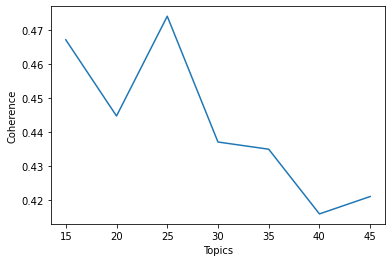

In [14]:
sns.lineplot(data=resultats, x="Topics", y="Coherence")

In [15]:
n_topics_optimal = resultats._get_value(resultats[['Coherence']].idxmax().values[0], 'Topics')
n_topics_optimal

25

In [24]:
compar_resultats['body_bow_lem'] = [n_topics_optimal, resultats[['Coherence']].max().values[0]]

In [16]:
best_coherence_data_lem_body = resultats._get_value(resultats[['Coherence']].idxmax().values[0], 'Coherence')

In [17]:
lda_model_lem_body = LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics_optimal,
                                           random_state=100,
                                              chunksize=100,
                                           passes=10)

In [18]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model_lem_body, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\tony.mathieux\anaconda3\envs\projet_5_modelisation\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
5      0.053851  0.274576       1        1  8.283610
13     0.217320 -0.092634       2        1  5.915656
2     -0.312163 -0.006869       3        1  5.478336
1      0.027656 -0.163981       4        1  5.452429
4      0.130700  0.064886       5        1  5.094513
18    -0.175503 -0.145208       6        1  4.911484
15     0.216416  0.063082       7        1  4.791212
10    -0.297598  0.128503       8        1  4.671852
17     0.132154 -0.149922       9        1  4.548217
23     0.299053 -0.034420      10        1  4.296730
19     0.278750  0.107456      11        1  3.899510
21     0.105736  0.177074      12        1  3.846852
20    -0.055791 -0.079688      13        1  3.806447
11    -0.028838  0.010730      14        1  3.797289
0     -0.087575 -0.315169      15        1  3.785069
24    -0.195427  0.004504      16        1  3.148768
22    -0.115364  0.120367      17        1  3.050945
14    -0.044643  0.163531      18        1  3.037730
9     -0.076166 -0.203057      19        1  2.930261
3      0.205160  0.244577      20        1  2.880530
6     -0.088645  0.313076      21        1  2.875001
16    -0.189169  0.251566      22        1  2.849008
7     -0.266119 -0.179588      23        1  2.332797
8      0.051324 -0.292328      24        1  2.328679
12     0.214881 -0.261062      25        1  1.987074, topic_info=          Term         Freq        Total Category  logprob  loglift
164      image  2513.000000  2513.000000  Default  30.0000  30.0000
62      python  1947.000000  1947.000000  Default  29.0000  29.0000
9         view  2228.000000  2228.000000  Default  28.0000  28.0000
18        file  5276.000000  5276.000000  Default  27.0000  27.0000
0          app  3559.000000  3559.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
601  character    40.195452   269.277379  Topic25  -5.3526   2.0165
62      python    47.134512  1947.088202  Topic25  -5.1933   0.1974
217    version    45.656307  2045.276002  Topic25  -5.2252   0.1164
3     function    45.677503  2549.923178  Topic25  -5.2247  -0.1037
50        help    44.816005  1290.078682  Topic25  -5.2438   0.5586

[1865 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
7716     18  0.887079          _
8682     13  0.913780         a9
6162     10  0.965556        aar
2416      6  0.943106        abc
2416     25  0.033682        abc
...     ...       ...        ...
6964     16  0.898669     zombie
2255     15  0.901395       zone
2255     24  0.083851       zone
8827      2  0.955688  zookeeper
2612      3  0.956609    zooming

[10470 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 14, 3, 2, 5, 19, 16, 11, 18, 24, 20, 22, 21, 12, 1, 25, 23, 15, 10, 4, 7, 17, 8, 9, 13])

## title_bow_lem

In [25]:
texts = X_train['title_bow_lem'].values.tolist()
corpus, id2word = create_corpus(texts)

In [26]:
model_results = {'Topics': [], 'Coherence': []}

In [27]:
pbar = tqdm.tqdm(total=len(topics_range))

for k in topics_range:
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word, k=k)
    # Save the model results
    model_results['Topics'].append(k)
    model_results['Coherence'].append(cv)

    pbar.update(1)
resultats = pd.DataFrame(model_results)
pbar.close()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:46<00:00, 23.85s/it]


In [28]:
resultats

,Topics,Coherence
0,15,0.559974
1,20,0.607525
2,25,0.610849
3,30,0.639058
4,35,0.669132
5,40,0.663582
6,45,0.662666


<AxesSubplot:xlabel='Topics', ylabel='Coherence'>

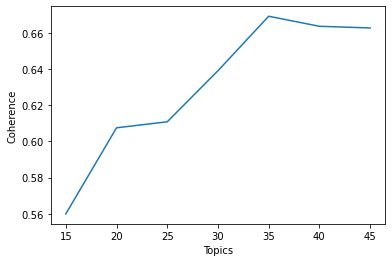

In [29]:
sns.lineplot(data=resultats, x="Topics", y="Coherence")

In [30]:
n_topics_optimal = resultats._get_value(resultats[['Coherence']].idxmax().values[0], 'Topics')
n_topics_optimal

35

In [31]:
compar_resultats['title_bow_lem'] = [n_topics_optimal, resultats[['Coherence']].max().values[0]]

In [ ]:
best_coherence_data_lem_title = resultats._get_value(resultats[['Coherence']].idxmax().values[0], 'Coherence')

In [32]:
lda_model_lem_title = LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics_optimal,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)
vis = gensimvis.prepare(lda_model_lem_title, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\tony.mathieux\anaconda3\envs\projet_5_modelisation\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2      0.463379 -0.130723       1        1  4.269050
0     -0.005340  0.478093       2        1  3.829270
23     0.318536  0.316630       3        1  3.747152
33    -0.362930  0.320307       4        1  3.579026
21     0.142650  0.433269       5        1  3.440951
6     -0.258108  0.310655       6        1  3.401056
9     -0.464415  0.024615       7        1  3.345827
16    -0.413505  0.165609       8        1  3.318747
24     0.438264  0.122773       9        1  3.266944
11    -0.118636 -0.453979      10        1  3.234525
19     0.320393 -0.099232      11        1  3.228477
30     0.199406  0.339096      12        1  3.153864
17     0.366162  0.225321      13        1  2.915686
25    -0.429849 -0.174901      14        1  2.904813
13     0.255236 -0.362933      15        1  2.862657
28     0.023605 -0.441493      16        1  2.853141
18    -0.261156 -0.373077      17        1  2.775739
34     0.352998 -0.253524      18        1  2.770736
3     -0.055491  0.369821      19        1  2.745234
5      0.142452 -0.399850      20        1  2.673527
15    -0.284294  0.091394      21        1  2.606742
27     0.056057 -0.266351      22        1  2.600849
20     0.395192  0.006198      23        1  2.558082
22     0.033955  0.108851      24        1  2.540922
1      0.213107 -0.205024      25        1  2.522687
10    -0.098519 -0.138910      26        1  2.514229
31    -0.162598  0.351625      27        1  2.451260
26     0.221970  0.078374      28        1  2.391488
7     -0.236104 -0.132781      29        1  2.378522
32    -0.352829 -0.057002      30        1  2.305673
29    -0.132828  0.114015      31        1  2.264358
4     -0.109198 -0.293992      32        1  2.238952
8     -0.299350 -0.251505      33        1  2.232669
14     0.055910 -0.045247      34        1  2.073120
12     0.045876  0.223877      35        1  2.004025, topic_info=            Term        Freq       Total Category  logprob  loglift
40    javascript  677.000000  677.000000  Default  30.0000  30.0000
97        python  734.000000  734.000000  Default  29.0000  29.0000
42          java  652.000000  652.000000  Default  28.0000  28.0000
165            v  605.000000  605.000000  Default  27.0000  27.0000
65          file  720.000000  720.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1560    coverage   11.438514   12.808576  Topic35  -4.6734   3.7969
1274         md5    8.875199    9.955637  Topic35  -4.9272   3.7951
2450         mat    8.300831    9.316912  Topic35  -4.9941   3.7945
1181      prefix    9.253492   10.398356  Topic35  -4.8854   3.7934
1168         log   10.582089   54.352896  Topic35  -4.7513   2.2737

[1237 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1296      7  0.924726  __init__
180       1  0.628612    access
180      11  0.137778    access
180      20  0.133472    access
180      21  0.081806    access
...     ...       ...       ...
1563     26  0.970912   youtube
769      32  0.952709         z
354      18  0.942549       zip
1979     15  0.920139      zone
918      19  0.953783      zoom

[1517 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 24, 34, 22, 7, 10, 17, 25, 12, 20, 31, 18, 26, 14, 29, 19, 35, 4, 6, 16, 28, 21, 23, 2, 11, 32, 27, 8, 33, 30, 5, 9, 15, 13])

## body_bow_stem

In [33]:
texts = X_train['body_bow_stem'].values.tolist()
corpus, id2word = create_corpus(texts)
model_results = {'Topics': [],'Coherence': []}

In [34]:
pbar = tqdm.tqdm(total=len(topics_range))

for k in topics_range:
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word, k=k)
    # Save the model results
    model_results['Topics'].append(k)
    model_results['Coherence'].append(cv)

    pbar.update(1)
resultats = pd.DataFrame(model_results)
pbar.close()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [04:22<00:00, 37.52s/it]


In [35]:
resultats

,Topics,Coherence
0,15,0.483882
1,20,0.449067
2,25,0.444113
3,30,0.434172
4,35,0.413419
5,40,0.418354
6,45,0.427392


<AxesSubplot:xlabel='Topics', ylabel='Coherence'>

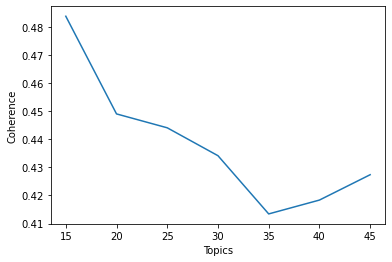

In [36]:
sns.lineplot(data=resultats, x="Topics", y="Coherence")

In [37]:
n_topics_optimal = resultats._get_value(resultats[['Coherence']].idxmax().values[0], 'Topics')
n_topics_optimal

15

In [38]:
compar_resultats['body_bow_stem'] = [n_topics_optimal, resultats[['Coherence']].max().values[0]]

In [39]:
lda_model_stem_body = LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics_optimal,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)
vis = gensimvis.prepare(lda_model_stem_body, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\tony.mathieux\anaconda3\envs\projet_5_modelisation\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.183491  0.202295       1        1  12.539531
0      0.155026  0.163587       2        1  11.806958
4     -0.231068 -0.007052       3        1   7.406725
5      0.267889  0.057167       4        1   7.127500
9      0.059819  0.025169       5        1   7.017696
6     -0.016436  0.187143       6        1   6.772850
3      0.046599 -0.117711       7        1   6.755856
13     0.024444  0.297711       8        1   6.078220
2     -0.087671 -0.247884       9        1   5.607774
14    -0.124237  0.093941      10        1   5.481515
12    -0.130060 -0.095645      11        1   5.446638
11     0.131834 -0.048723      12        1   5.169934
7     -0.239699 -0.140368      13        1   5.034336
8      0.264370 -0.108998      14        1   4.884637
10     0.062680 -0.260632      15        1   2.869829, topic_info=       Term         Freq        Total Category  logprob  loglift
18     file  5352.000000  5352.000000  Default  30.0000  30.0000
161    imag  2740.000000  2740.000000  Default  29.0000  29.0000
9      view  2496.000000  2496.000000  Default  28.0000  28.0000
193  server  3005.000000  3005.000000  Default  27.0000  27.0000
0       app  3692.000000  3692.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
220  object    70.527412  2032.564082  Topic15  -5.1634   0.1899
24      lot    62.140042  1108.086436  Topic15  -5.2900   0.6699
510   sourc    60.434168  1120.420759  Topic15  -5.3178   0.6310
0       app    66.166473  3692.512355  Topic15  -5.2272  -0.4710
313   anyth    59.689630  1104.445701  Topic15  -5.3302   0.6330

[1145 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5690     15  0.959794     aar
2281      7  0.018445     abc
2281     13  0.977559     abc
5439     11  0.929448     abi
184       1  0.093127  access
...     ...       ...     ...
767       5  0.066539    zoom
767       7  0.011090    zoom
767      10  0.011090    zoom
767      13  0.011090    zoom
767      14  0.776285    zoom

[5544 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 6, 10, 7, 4, 14, 3, 15, 13, 12, 8, 9, 11])

## title_bow_stem

In [40]:
texts = X_train['title_bow_stem'].values.tolist()
corpus, id2word = create_corpus(texts)
model_results = {'Topics': [],'Coherence': []}

In [41]:
pbar = tqdm.tqdm(total=len(topics_range))

for k in topics_range:
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word, k=k)
    # Save the model results
    model_results['Topics'].append(k)
    model_results['Coherence'].append(cv)

    pbar.update(1)
resultats = pd.DataFrame(model_results)
pbar.close()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:46<00:00, 23.82s/it]


In [42]:
resultats

,Topics,Coherence
0,15,0.565871
1,20,0.597897
2,25,0.603668
3,30,0.627991
4,35,0.661768
5,40,0.627270
6,45,0.654668


<AxesSubplot:xlabel='Topics', ylabel='Coherence'>

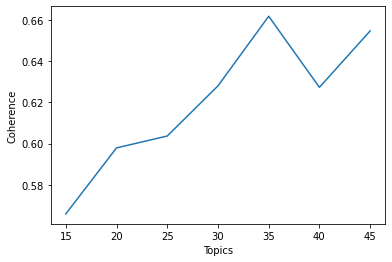

In [43]:
sns.lineplot(data=resultats, x="Topics", y="Coherence")

In [44]:
n_topics_optimal = resultats._get_value(resultats[['Coherence']].idxmax().values[0], 'Topics')
n_topics_optimal

35

In [45]:
compar_resultats['title_bow_stem'] = [n_topics_optimal, resultats[['Coherence']].max().values[0]]

In [46]:
lda_model_stem_title = LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics_optimal,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)
vis = gensimvis.prepare(lda_model_stem_title, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\tony.mathieux\anaconda3\envs\projet_5_modelisation\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
8      0.462338 -0.123856       1        1  3.700772
10     0.009153  0.461447       2        1  3.613399
16     0.297892  0.228675       3        1  3.547273
26    -0.368379  0.314917       4        1  3.487102
3      0.137076  0.434165       5        1  3.481698
34    -0.276752  0.325898       6        1  3.373284
2     -0.465274  0.038780       7        1  3.348472
12    -0.402374  0.161646       8        1  3.317022
25     0.429060  0.125206       9        1  3.281412
9     -0.113152 -0.449560      10        1  3.264007
24     0.268497 -0.098716      11        1  3.257033
28     0.234513  0.361051      12        1  3.190602
29     0.370084  0.278363      13        1  3.111627
19    -0.434971 -0.167344      14        1  3.093360
32     0.257446 -0.375087      15        1  3.055409
0      0.022611 -0.444251      16        1  3.054844
21    -0.250617 -0.375575      17        1  2.965913
20     0.370509 -0.247107      18        1  2.921557
22    -0.103790  0.419192      19        1  2.824313
4      0.134168 -0.403940      20        1  2.602233
7     -0.267610  0.075482      21        1  2.560376
27     0.068491 -0.251759      22        1  2.525439
6      0.413581  0.007309      23        1  2.517391
33     0.022521  0.129974      24        1  2.513236
1      0.242863 -0.232960      25        1  2.482214
14    -0.084356 -0.146396      26        1  2.422486
15    -0.140290  0.313272      27        1  2.409056
18     0.241650  0.053037      28        1  2.388356
13    -0.251350 -0.147683      29        1  2.386884
30    -0.365676 -0.059963      30        1  2.356348
5     -0.138087  0.128833      31        1  2.293103
31    -0.117903 -0.287306      32        1  2.224006
11    -0.312310 -0.266221      33        1  2.215809
23     0.047560 -0.030484      34        1  2.138239
17     0.062880  0.250961      35        1  2.075727, topic_info=            Term        Freq       Total Category  logprob  loglift
96        python  711.000000  711.000000  Default  30.0000  30.0000
65          file  670.000000  670.000000  Default  29.0000  29.0000
42          java  623.000000  623.000000  Default  28.0000  28.0000
40    javascript  639.000000  639.000000  Default  27.0000  27.0000
161           vs  542.000000  542.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
436       layout   47.717839   64.072672  Topic35  -3.2803   3.5801
1473       comma   14.773005   17.877949  Topic35  -4.4528   3.6841
1771       ident   32.378999   45.609247  Topic35  -3.6681   3.5323
1184     pyspark   17.276343   29.754291  Topic35  -4.2962   3.3312
185          wpf   14.004433   92.890389  Topic35  -4.5062   1.9828

[1293 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1253     35  0.905141  __init__
176       3  0.029584    access
176       9  0.004226    access
176      11  0.004226    access
176      19  0.934005    access
...     ...       ...       ...
750      34  0.800854         z
347      27  0.963474       zip
1887     12  0.845637      zone
892       5  0.810596      zoom
892      33  0.162119      zoom

[1739 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 11, 17, 27, 4, 35, 3, 13, 26, 10, 25, 29, 30, 20, 33, 1, 22, 21, 23, 5, 8, 28, 7, 34, 2, 15, 16, 19, 14, 31, 6, 32, 12, 24, 18])

In [48]:
pd.DataFrame(compar_resultats, index=['n_topics', 'coherence_score'])

,body_bow_lem,title_bow_lem,body_bow_stem,title_bow_stem
n_topics,25.000000,35.000000,15.000000,35.000000
coherence_score,0.474135,0.669132,0.483882,0.661768


In [53]:
texts = X_train['title_bow_lem'].values.tolist()
corpus, id2word = create_corpus(texts)

In [54]:
M_topics_words = pd.DataFrame(
    lda_model_lem_title.get_topics(), 
    columns=lda_model_lem_title.id2word.values(), 
    index=[f'topic {i}' for i in range(lda_model_lem_title.num_topics)])

In [55]:
M_topics_words

,code,csharp,execution,practice,dropbox,environment,git,line,meld,status,...,chubby,ndb,memset,il,splitting,javabean,lowercase,heat,photoscroller,wwdc
topic 0,0.000012,0.000023,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
topic 1,0.000045,0.000056,0.000131,0.000019,0.000019,0.000019,0.000019,0.000088,0.000019,0.000019,...,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019
topic 2,0.000011,0.000011,0.000171,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,...,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011
topic 3,0.000018,0.000079,0.000018,0.000044,0.000018,0.000018,0.000018,0.000023,0.000018,0.000018,...,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
topic 4,0.000023,0.000023,0.000023,0.000023,0.000023,0.000029,0.000023,0.000023,0.000023,0.000023,...,0.000023,0.000023,0.000023,0.000023,0.000023,0.000023,0.000023,0.000023,0.000023,0.000023
topic 5,0.000018,0.000018,0.000018,0.000018,0.000018,0.000050,0.000018,0.000026,0.000018,0.033412,...,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
topic 6,0.000043,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014
topic 7,0.000048,0.000067,0.000022,0.000022,0.000022,0.000022,0.000022,0.000075,0.000022,0.000022,...,0.000022,0.000022,0.000022,0.000022,0.000022,0.000022,0.000022,0.000022,0.000022,0.000022
topic 8,0.000049,0.000023,0.000023,0.000115,0.000023,0.000023,0.000023,0.000034,0.000023,0.000023,...,0.000023,0.000023,0.000023,0.000023,0.000023,0.000023,0.000023,0.000023,0.000023,0.000023
topic 9,0.000018,0.000021,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014


In [56]:
a = len(lda_model_lem_title.get_document_topics(corpus[0], minimum_probability=0))
M_quest_topics = {i:[lda_model_lem_title.get_document_topics(corpus[i], minimum_probability=0)[j][1] for j in range(a)] for i in range(len(corpus))}
M_quest_topics = pd.DataFrame.from_dict(M_quest_topics, orient='index')
M_quest_topics

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.005714,0.005714,0.005714,0.005714,0.005714,0.005714,0.005714,0.005714,0.005714,0.005714,...,0.005714,0.005714,0.005714,0.005714,0.005714,0.005714,0.005714,0.005714,0.005714,0.005714
1,0.004083,0.004083,0.004083,0.004083,0.004083,0.146969,0.004083,0.004083,0.004083,0.004083,...,0.004083,0.004083,0.004083,0.004083,0.004083,0.004083,0.004083,0.004083,0.004083,0.004083
2,0.007143,0.007143,0.757137,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,...,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143
3,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,...,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571
4,0.004084,0.004084,0.004084,0.004084,0.004084,0.004084,0.004084,0.004084,0.004084,0.004084,...,0.004084,0.004084,0.004084,0.004084,0.004084,0.004084,0.004084,0.004084,0.004084,0.299407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19777,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286,...,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286
19778,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,...,0.009524,0.009524,0.009524,0.009524,0.009524,0.342858,0.009524,0.009524,0.009524,0.009524
19779,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,0.342852,0.009524,0.009524,0.009524,...,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524
19780,0.009524,0.342837,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,...,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524


In [58]:
M_quest_words = np.dot(M_quest_topics.to_numpy(), M_topics_words.to_numpy())
M_quest_words

array([[8.1996366e-02, 3.4831051e-02, 5.7483804e-03, ..., 1.6868013e-05,
        1.6868013e-05, 1.6868013e-05],
       [8.5805875e-04, 7.4394979e-04, 2.4684556e-04, ..., 1.5599420e-05,
        1.5599418e-05, 1.5599418e-05],
       [1.4613139e-03, 1.2274145e-03, 2.4459988e-04, ..., 1.2681412e-05,
        1.2681411e-05, 1.2681411e-05],
       ...,
       [1.9601621e-03, 1.6836475e-03, 1.6818497e-04, ..., 1.9035393e-05,
        1.9035393e-05, 1.9035393e-05],
       [1.9575178e-03, 1.6492471e-03, 2.0367741e-04, ..., 1.7313811e-05,
        1.7313811e-05, 1.7313811e-05],
       [5.8122445e-03, 4.8766695e-03, 4.6530113e-04, ..., 1.7857623e-05,
        1.7857625e-05, 1.7857625e-05]], dtype=float32)

In [59]:
M_quest_words.shape

(19782, 7106)